<a href="https://colab.research.google.com/github/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/blob/main/Belajar%20Pengembangan%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Few Handy Short Function**

https://ichi.pro/id/pengenalan-praktis-ke-keras-callback-di-tensorflow-2-123544941381990

https://towardsdatascience.com/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966



In [ ]:
# from tensorflow.keras.layers import Dropout

#      model = Sequential()
#      model.add(Dense(10, activation='relu', 
#             kernel_initializer='he_normal', input_shape=(n_features,)))
#      model.add(Dropout(0.5))
#      model.add(Dense(1, activation='sigmoid'))




# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# from tensorflow.keras.callbacks import ModelCheckpoint
 
 
# 	early_stopping = EarlyStopping(patience=5, monitor='val_loss')

# EarlyStopping(
#     monitor='val_loss', 
#     patience=0, 
#     min_delta=0, 
#     mode='auto'
# )

# custom_early_stopping = EarlyStopping(
#     monitor='val_accuracy', 
#     patience=3, 
#     min_delta=0.001, 
#     mode='max'
# )
	

# 	reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_lr=0.001,
# 	                        patience=5, mode='min',
# 	                        verbose=1)
	

# 	model_checkpoint = ModelCheckpoint(monitor='val_loss', 
# 	                             filepath='./best_model.h5', 
# 	                             save_best_only=True)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
#                                                  save_weights_only=True,
#                                                  save_best_only=True,
#                                                  monitor='val_loss')
	

# 	callbacks = [
# 	    early_stopping,
# 	    reduce_lr,
# 	    model_checkpoint
# 	]
	

#     history = model.fit(train_iterator,
# 	                    validation_data=validation_iterator,
# 	                    epochs=100,
# 	                    callbacks=callbacks)

# **Prediction**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
xs = np.array ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

In [ ]:
# model = tf.keras.Sequential([
#     keras.layers.Dense(units = 1, input_shape = [1]),
#     keras.layers.Dense(units=8),
#     keras.layers.Dense(units=1)
# ])

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [ ]:
model.compile(
    optimizer = 'sgd',
    loss = 'mean_squared_error'
)

In [ ]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 39.1019
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 18.3740
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 8.7785
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 4.3354
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 2.2770
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 1.3224
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8786
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6712
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5733
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5261
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5024
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4895
Epoch 13/500
1/1 [==============================] - 0s 15ms

In [ ]:
print(model.predict([10.0]))

[[22.353521]]


# **Module 3 : Build dan Train Neural Network Model Tensorflow dan Keras**

## **01. Bangun Model untuk Klasifikasi Dua Kelas**

Nah, pada submodul ini kita akan coba melatih model untuk mengklasifikasikan apakah sebuah buah merupakan jeruk atau anggur. Untuk datasetnya bisa Anda unduh di tautan berikut.

https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit



In [ ]:
import pandas as pd
# df = pd.read_csv('citrus.csv')
# df = pd.read_csv('https://drive.google.com/uc?id=1uTwD4MVC8mNc77U5-53scIzPML2MjVcY')
df = pd.read_csv('https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/citrus.csv')

Kemudian untuk melihat overview dari dataset kita bisa memanggil fungsi info() pada dataframe. Dapat kita lihat di bawah bahwa pada dataset terdapat 6 buah kolom dengan 1 kolom memiliki value bertipe ‘object’, dan 5 bertipe numerik.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


Selanjutnya gunakan fungsi head() untuk menampilkan dataframe kita.

In [ ]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


Nah, masih ingat bukan kalau sebuah jst tidak bisa memproses string? Karena itulah kita harus mengubah nilai-nilai pada kolom label menjadi numerik terlebih dahulu agar bisa diproses oleh jst.

Jalankan kode di bawah untuk mengubah nilai-nilai pada kolom name menjadi bilangan numerik. Untuk nilai yang berisi string ‘orange’ akan diubah menjadi 0 dan nilai yang berisi string ‘grapefruit’ akan diubah menjadi 1.

In [ ]:
df.name[df.name == 'orange'] = 0
df.name[df.name == 'grapefruit'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Sampai pada tahap ini model kita belum dapat memproses dataset ini karena dataset kita masih dalam bentuk dataframe. Betul, dataset harus dalam bentuk array agar dapat diproses oleh model. Nah untungnya kita dapat melakukan ini dengan mudah menggunakan atribut values dari dataframe. Values mengembalikan numpy array yang dikonversi dari dataframe.

In [ ]:
dataset = df.values
dataset

array([[0, 2.96, 86.76, 172, 85, 2],
       [0, 3.91, 88.05, 166, 78, 3],
       [0, 4.42, 95.17, 156, 81, 2],
       ...,
       [1, 15.59, 256.5, 168, 82, 20],
       [1, 15.92, 260.14, 142, 72, 11],
       [1, 16.45, 261.51, 152, 74, 2]], dtype=object)

Kemudian kita perlu memisahkan antara atribut dan label pada dataset. Dari eksplorasi data kita sebelumnya, dapat diketahui bahwa 4 kolom terakhir adalah kolom atribut. Untuk memilih 4 kolom terakhir jalankan kode di bawah. 

In [ ]:
# pilih 4 kolom terakhir sebagai atribut
X = dataset[:,1:6]
# bilangan sebelum koma untuk memilih baris pada dataframe
# bilangan setelah koma untuk memilih kolom pada dataframe

Jangan lupa untuk memisahkan label dari dataset. Pada dataset kita, label terdapat pada kolom pertama. Jalankan kode di bawah untuk membuat sebuah array numpy yang hanya berisi label kita.

In [ ]:
y = dataset[:,0]

Selanjutnya ada tahap yang sangat penting dilakukan agar jst bisa mempelajari dataset dengan baik, apalagi kalau bukan normalisasi. Kita bisa menggunakan fungsi fit_transform() dari sebuah objek MinMaxScaler dari library preprocessing SKLearn untuk menormalisasi data kita.

In [ ]:
# Normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

Setelah kita memiliki atribut dan label yang terpisah, kita juga akan memisahkan kembali data kita menjadi data latih dan data uji untuk mengevaluasi kinerja model kita. Fungsi train_test_split dapat membantu kita untuk melakukan hal ini dengan mudah. Pada latihan ini kita akan menggunakan 30% dari seluruh data sebagai data uji.

In [ ]:
# pisahkan data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

Dataset telah dipisahkan ke dalam training dan test set.  Karena tadi kita mengubah nilai-nilai pada kolom name menjadi bilangan numerik, yang artinya kita mengubah label menjadi tipe data boolean, maka kita perlu mengubah tipe data tersebut menjadi float32 dengan cara berikut.

In [ ]:
import numpy as np
 
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

Nah, tahap memproses data kita telah selesai. Sekarang kita mulai membangun model jst kita. Impor library di bawah dan lanjutkan ke tahap berikutnya.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Untuk model yang kita kembangkan adalah model sequential yang memiliki 3 buah layer seperti di bawah. Activation function pada 2 layer pertama yang dapat digunakan adalah relu untuk latihan ini. Anda dapat bereksplorasi menggunakan activation function lain. Untuk layer terakhir, isi parameter unit isi dengan 1 di mana output dari jst kita merupakan satu buah bilangan numerik. Activation function pada layer terakhir dipilih sigmoid karena sigmoid memetakan probabilitas dari 0 sampai 1. Sigmoid sangat cocok digunakan pada masalah klasifikasi biner.

In [ ]:
model = Sequential([
                    Dense(32, activation='relu', input_shape=(5,)),    
                    Dense(32, activation='relu'),    
                    Dense(1, activation='sigmoid'),])

Kemudian setelah arsitektur dari jst dibentuk, kita perlu menentukan optimizer dan loss function dari model kita. Untuk optimizer kita akan menggunakan stochastic gradient descent (sgd) yang merupakan optimizer yang sangat umum dan cocok dipakai pada dataset yang berukuran kecil. Dan untuk loss yang sesuai adalah ‘binary_crossentropy’ karena masalah pada latihan kita kali ini adalah masalah 2 kelas (biner). 

Selain itu jika kita ingin menampilkan akurasi pada setiap proses pelatihan model kita dapat menambahkan parameter metrics dan mengisinya dengan string ‘accuracy’.

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6788 - accuracy: 0.6599
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6104 - accuracy: 0.9053
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.5157 - accuracy: 0.9139
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.9191
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3257 - accuracy: 0.9216
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9253
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2337 - accuracy: 0.9251
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2133 - accuracy: 0.9246
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2013 - accuracy: 0.9267
Epoch 10/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1937 - accura

Terakhir, jangan lupa untuk mengevaluasi model Anda dan melihat apakah model Anda underfit atau overfit. Untuk melihat loss dan akurasi model pada data test, gunakan fungsi evaluate pada model. Fungsi Evaluate mengembalikan 2 nilai. Yang pertama adalah nilai loss, dan yang kedua adalah nilai akurasinya.

In [ ]:
model.evaluate(X_test, Y_test)
# elemen pertama adalah loss dan elemen kedua adalah akurasi

94/94 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 0.9263


[0.1794092357158661, 0.9263333082199097]

## **02. Build dan Train Model untuk Klasifikasi Banyak Kelas**

Pada submodul kali ini kita akan melanjutkan dengan pengembangan model jst untuk klasifikasi multi-kelas. Aplikasi dari klasifikasi multi kelas sangat banyak, lebih banyak dari klasifikasi biner. Contohnya seperti produk-produk pada toko online dan program pengenalan wajah. Tentu terdapat lebih dari 2 jenis wajah manusia di bumi ini bukan?

Nah langsung saja kita mulai latihan kita. Pada kelas sebelumnya kita telah belajar mengklasifikasi dataset iris menggunakan decision tree. Di submodul ini kita akan belajar menggunakan jst untuk mengklasifikasikan spesies bunga iris. Silahkan unduh data di tautan berikut 

https://www.kaggle.com/uciml/iris

https://drive.google.com/file/d/190-JCezsTIMIe4t8bYXPiS28Ed4bjkqi/view?usp=sharing

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# df = pd.read_csv('Iris.csv')
df = pd.read_csv('https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/Iris.csv')
# df = pd.read_csv('https://drive.google.com/uc?id=190-JCezsTIMIe4t8bYXPiS28Ed4bjkqi')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dapat kita lihat bahwa terdapat kolom id yang tidak ada hubungan dengan label sehingga kita perlu membuang kolom tersebut. Untuk membuang kolom dari dataframe gunakan fungsi drop().

In [ ]:
df = df.drop(columns='Id')

Selanjutnya kita perlu melakukan one hot encoding karena label kita merupakan data kategorikal. Fungsi get_dummies() memudahkan kita untuk melakukan hal ini.

In [ ]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


Kemudian, kita perlu menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena kolom tersebut tidak akan dipakai.

In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


Selanjutnya setelah dataframe kita olah, kita konversi dataframe tersebut menjadi numpy array dengan fungsi values dari dataframe.

In [ ]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

Nah, tahap berikutnya adalah kita memisahkan antara atribut dan label dengan menjalankan kolom di bawah.

In [ ]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

Lalu, kite perlu lakukan normalisasi data agar data dapat dipelajari dengan baik oleh jst kita.

In [ ]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Lakukan pembagian data menjadi data latih dan data uji. Untuk ukuran data testing yang digunakan 30%. Anda dapat bereksperimen menggunakan nilai lainnya.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

Untuk arsitektur model kita kali mini menggunakan 3 buah layer. Activation function yang digunakan pada layer terakhir dipilih softmax karena activation tersebut umum dipakai untuk klasifikasi multi kelas seperti ini. 

In [ ]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])

Lanjutkan dengan menentukan optimizer dan loss function dari model. Untuk masalah klasifikasi multi kelas, Anda dapat menggunakan loss ‘categorical_crossentropy’.

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Nah, pada latihan ini ada sedikit perubahan. Fungsi fit() sekarang kita tampung ke dalam objek hist(history). Untuk apa kita melakukan hal ini? Temukan jawabannya di submodul berikutnya ya.

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0631 - accuracy: 0.6095
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0192 - accuracy: 0.6762
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9816 - accuracy: 0.6762
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9445 - accuracy: 0.6762
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9083 - accuracy: 0.6762
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8713 - accuracy: 0.6762
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8352 - accuracy: 0.6762
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7983 - accuracy: 0.6762
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7609 - accuracy: 0.6762
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7244 - accuracy: 0.6762
Epoch 11/100
4/4 [===========

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.1128 - accuracy: 0.9556


[0.11275200545787811, 0.9555555582046509]

## **03. Plot Loss dan Akurasi dari Trained Model**

Di modul sebelumnya kita pasti penasaran kenapa menampung fungsi fit pada sebuah objek history. Jawabannya adalah karena kita dapat membuat plot dari akurasi dan loss model kita pada saat proses pelatihan. 

Plot ini sangat berguna untuk melihat proses keseluruhan pembelajaran model seiring waktu. Untuk melihat bagaimana plot bekerja kita kerjakan latihan berikut. Kita akan menggunakan dataset dan model yang sama dengan latihan sebelumnya. Anda dapat menggunakan latihan sebelumnya dan menambahkan kode-kode berikut di bawah latihan sebelumnya

In [ ]:
import matplotlib.pyplot as plt

Kemudian dengan objek pyplot kita akan melakukan plot dari objek history. Objek history menampung informasi dari akurasi dan loss model pada setiap epoch di proses pelatihan. Sehingga kita bisa membuat plot akurasi atau loss dari model. Kode di bawah menunjukkan bagaimana kita bisa membuat plot loss dari model. Untuk mengakses loss kita bisa memanggil fungsi history pada objek history dan memilih metrik loss. Dari hasil plot loss di bawah Anda dapat hat bahwa loss model berkurang sangat signifikan dari epoch pertama sampai ke epoch ke-100.

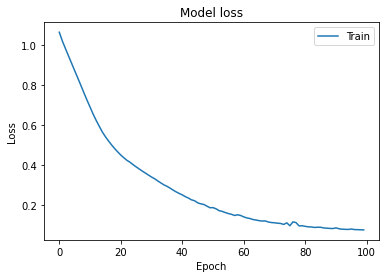

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Untuk membuat plot dari akurasi kita bisa memilih metrik accuracy pada fungsi history. Dari hasil plot di bawah, cek bahwa akurasi model stagnan pada epoch di sekitar 20 dan juga kembali stagnan pada epoch di atas 80.

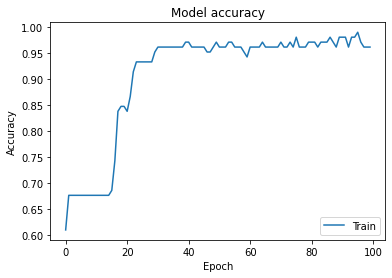

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## **04. Mencegah Overfitting dengan Dropout**

overfitting adalah situasi dimana sebuah model memiliki performa yang bagus saat mengenali data latih, namun performanya buruk saat mengenali data-data baru yang belum pernah ditemuinya.

Begitu juga dengan jaringan saraf tiruan. Terus, apakah solusinya?

Salah satunya dengan menggunakan dropout. Dropout adalah standar umum di industri yang dipakai untuk mencegah overfitting. Seperti yang kita ketahui, semakin kompleks sebuah model ML, maka akan semakin tinggi kemungkinan model tersebut mengalami overfitting. Dropout bekerja dengan mengurangi kompleksitas model jst tanpa merubah arsitektur model tersebut. 

Bagaimana dropout bekerja? Nama dropout mengacu pada unit/perseptron yang di-dropout (dibuang) secara temporer pada sebuah layer. Contohnya seperti di bawah di mana besaran dropout yang dipilih adalah 0.5 sehingga 50% dari persepteron hidden layer kedua dimatikan secara berkala pada saat pelatihan. 

Efek dari dropout sendiri adalah, weight dari setiap neuron pada sebuah layer tidak akan statis yang menyebabkan jaringan saraf terlalu menyesuaikan dengan data latih sehingga overfitting. 

Untuk mengimplementasikan dropout sendiri sangatlah gampang pada Keras. Anda cukup menambahkan layer dropout pada sebuah hidden layer di model Anda. Agar lebih jelas lihatlah contoh di bawah.

```
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
```

Untuk menggunakan dropout kita cukup menambahkan layer tf.keras.layers.Dropout() dan mengisi parameter berupa persentasi dropout yang kita inginkan seperti di bawah. Dropout akan otomatis diaplikasikan pada layer yang mendahuluinya


## **05. Penggunaan Callbacks**

Pada latihan-latihan sebelumnya pelatihan model berlangsung sebanyak jumlah epoch yang kita tentukan sebelumnya. Dan kalau kita amati, pada epoch-epoch terakhir akurasi dari model tidak meningkat lagi. Kasus lainnya misalnya kita memiliki 100 epoch, dan pada epoch ke 20 akurasi dari model sudah memenuhi target kita. 

Untunya kita dapat memberi tahu model kita untuk berhenti ketika telah mencapai akurasi tertentu sehingga proses pelatihan model menjadi lebih singkat.

Kita dapat melakukan ini dengan menggunakan fungsi callback. Yup, fungsi callback membantu kita untuk memberi tahu model agar berhenti melakukan pelatihan ketika sudah mencapai target tertentu. Fungsi ini sangat berguna untuk menghemat waktu pelatihan dari model seperti yang dijelaskan pada paragraf sebelumnya.

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# df = pd.read_csv('Iris.csv')
df = pd.read_csv('https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/Iris.csv')
# df = pd.read_csv('https://drive.google.com/uc?id=190-JCezsTIMIe4t8bYXPiS28Ed4bjkqi')
df = df.drop(columns='Id')

category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values

X = dataset[:,0:4]
y = dataset[:,4:7]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='sigmoid'),])

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Selanjutnya kita buat kelas callback. Pada baris pertama lihatlah  bahwa kelas callback kita harus inherit tf.keras.callbacks.Callback. Selanjutnya kita buat fungsi yang paling penting yaitu on_epoch_end(). Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Selanjutnya kode `if(logs.get(‘accuracy’)>0.9)` sangat intuitif menunjukkan kalau kode itu memiliki arti "jika akurasi lebih besar dari 0.9 maka eksekusi perintah berikutnya". Kita juga dapat menulis kode `print("\nAkurasi telah mencapai >90%!")` untuk ditampilkan ketika callback aktif.

Kode `self.model.stop_training = True` adalah kode yang memberi tahu model untuk menghentikan pelatihan. Setelah kelas ini dibuat kita buat objek dari kelas tersebut.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

Untuk menggunakan callback sangat gampang, kita hanya perlu menambahkan parameter callback dan mengisi objek callback yang telah kita buat pada parameter tersebut.

In [ ]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0652 - accuracy: 0.2952
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0251 - accuracy: 0.3524
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9931 - accuracy: 0.3619
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9668 - accuracy: 0.3714
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9411 - accuracy: 0.4286
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9173 - accuracy: 0.5714
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8943 - accuracy: 0.6476
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8683 - accuracy: 0.6762
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8432 - accuracy: 0.6762
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8195 - accuracy: 0.6762
Epoch 11/50
4/4 [======================

## **06. Menggunakan Dataset dari tf.data.datasets**

Seperti yang telah kita lakukan pada kelas sebelumnya, tensorflow juga menyediakan dataset siap pakai yang dapat kita gunakan untuk belajar. Anda dapat mengunjungi tautan berikut untuk melihat dataset apa saja yang tersedia dari library tensorflow.

https://www.tensorflow.org/api_docs/python/tf/keras/datasets



In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


Kemudian kita buat objek untuk menampung dataset kita dan masukkan fungsi `tf.keras.datasets.<nama_dataset>` pada objek tersebut.

In [ ]:
mnist = tf.keras.datasets.mnist

Fungsi load_data() dari objek dataset mengembalikan dataset yang telah dibagi menjadi atribut latih, label latih, atribut uji, dan label uji.

In [ ]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Kita bisa menampilkan label dan salah satu gambar dari data latih menggunakan library matplotlib.

5


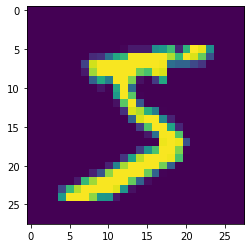

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

Namun, dataset yang kita milik, masih belum dinormalisasi, sehingga kita harus melakukannya secara manual. Kode di bawah berfungsi untuk membagi setiap piksel pada gambar sebesar 255 karena nilai sebuah piksel berkisar dari 0 sampai 255.

In [ ]:
gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

Kita gunakan 3 layer sebagai arsitektur model kita. Untuk layer pertama kita menggunakan layer khusus yaitu Flatten yang berfungsi untuk mengubah input kita yang berupa matriks 2 dimensi menjadi array 1 dimensi. 

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Terakhir kita tentukan optimizer dan loss untuk model kita dan mulai pelatihan model kita. 

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2565 - accuracy: 0.9267
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1121 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0767 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0584 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0449 - accuracy: 0.9858


## **07. Penggunaan Batch Loading**

Pada submodul ini kita akan membahas teknik yang umum dipakai di industri yaitu batch loading. Apa itu batch loading?

Batch loading adalah proses pelatihan dimana jst melakukan pembaruan parameternya (weight) setelah membaca sejumlah sampel data tertentu. Misal dataset kita berisi 800 buah gambar pizza. Tanpa batch size, proses pembaruan parameter terjadi untuk seluruh sampel pada dataset. Sehingga ketika tanpa menggunakan batch size, pada 1 epoch terdapat 800 kali pembaruan weight. Ketika 1 ukuran batch adalah 32 buah gambar pizza, maka terdapat 25 buah batch pada dataset. Pada batch loading, model baru melakukan pembaruan parameter setelah membaca satu batch atau 32 buah gambar pizza. Sehingga proses pembaruan parameter pada 1 epoch hanya sebanyak kali.

Apakah Anda sudah menyadari apa fungsi dari batch loading? Yup benar. Dengan batch loading proses pelatihan data menjadi jauh lebih cepat. Kita akan melihat langsung kegunaan dari batch loading dengan latihan di bawah.

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Disini kita mulai menggunakan batch loading. Untuk menggunakan batch loading kita hanya tinggal menambahkan parameter ‘batch_size’ pada fungsi fit(). Tahukah Anda bahwa fungsi fit() secara default menggunakan batch loading dengan batch size sebesar 32. Lantas  ketika kita tidak mendefinisikan parameter batch_size, maka ukuran batch akan diisi sebesar 32 secara default. Perhatikan bahwa pada setiap epoch memakan waktu selama sekitar 3 atau 4 detik.

In [ ]:
model.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2639 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1163 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0795 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0595 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0461 - accuracy: 0.9864


Selanjutnya kita akan menggunakan batch_size yang lebih besar yaitu 128. Dapat kita lihat bahwa semakin besar batch size, semakin banyak juga waktu eksekusi tiap epoch yang jadi  lebih cepat. Silakan Anda bereksperimen menggunakan batch size yang lain. 

In [ ]:
model.fit(training_images, training_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9934
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0200 - accuracy: 0.9958
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0178 - accuracy: 0.9961
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0160 - accuracy: 0.9966
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0141 - accuracy: 0.9972


berubah lebih cepat dengan 2s

ada latihan ini kita telah memahami bahwa dengan menggunakan batch loading, kita dapat mempercepat pelatihan model kita. Untuk pemilihan batch size sendiri tidak ada aturan bakunya namun yang umum dipakai adalah 32,64, dan 128. Anda umumnya harus bereksperimen sendiri guna menemukan batch size yang cocok dengan masalah Anda. 

Referensi:

* Preprocessing for neural network - https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
* Good explanation about batch - https://medium.com/analytics-vidhya/when-and-why-are-batches-used-in-machine-learning-acda4eb00763
* Tips for Dropout https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/  

# **Modul 4 : Sistem Rekomendasi**

https://colab.research.google.com/drive/1Hx-I1wWHYNp6ndGGafQjq-_I77Urf8fK?usp=sharing

# **Modul 5 : Image Classification**

https://medium.com/@16611110/apa-itu-convolutional-neural-network-836f70b193a4

https://machinelearning.mipa.ugm.ac.id/2018/09/30/klasifikasi-gambar-sederhana-menggunakan-convolutional-neural-network/

https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF

https://algorit.ma/blog/convolutional-neural-networks-tensorfflow/#:~:text=Convolutional%20Neural%20Network%20merupakan%20salah,satu%20gambar%20dengan%20yang%20lainnya.

https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480

## **01. Build dan Train Model untuk Memproses Image Dataset dari Dunia Nyata**

Jarang sekali dataset yang kita temui telah dalam kondisi telah diolah dan dalam format dan ukuran yang seragam.

Untungnya library keras menyediakan ImageDataGenerator yang dapat mempermudah kita dalam memproses data untuk model kita. 



Chessman Image : 
[Github](https://github.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/blob/main/data/Chessman-image-dataset.zip)
 | [Kaggle](https://www.kaggle.com/nurimammasri/chessman-image-dataset)

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2021-10-01 05:18:20--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2021-10-01 05:18:21--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   101MB/s    in 

Selanjutnya kita perlu melakukan ekstraksi terhadap dataset yang kita unduh karena dataset dalam bentuk file zip.

In [ ]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Gunakan fungsi listdir dari kelas os untuk melihat direktori yang terdapat pada dataset. Dapat kita lihat bahwa terdapat 6 buah direktori pada dataset. Setiap direktori berisi gambar pion catur sesua dengan nama direktorinya.

In [ ]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Knight', 'King', 'Queen', 'Pawn', 'Rook', 'Bishop']

Selanjutnya kita perlu melihat berapa banyak gambar pada setiap direktori. Dari output dapat dilihat bahwa jumlah sampel pada tiap direktori berbeda. Perlu diperhatikan juga dataset ini berukuran sangat kecil sehingga performa dari model mungkin tidak akan terlalu baik. Kita akan mencoba menggunakan augmentasi gambar untuk mengatasi masalah ini.

In [ ]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


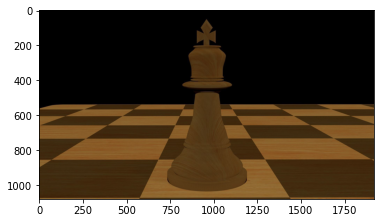

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

Selanjutnya kita impor ImageDataGenerator dan aplikasikan augmentasi gambar pada dataset kita. Perhatikan bahwa ada parameter yaitu validation split.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

Dataset yang kita miliki hanya terdiri dari 1 buah direktori dan tidak terbagi menjadi direktori training dan testing. Tapi tenang, dengan ImageDataGenerator kita tidak perlu susah payah membagi direktori secara manual, cukup dengan menggunakan parameter validation_split yang disebut pada paragraf sebelumnya. Dengan parameter tersebut, kita hanya cukup memberi tahu ImageDataGenerator mana data untuk training dan mana data untuk testing dengan menambahkan parameter subset dengan nilai training atau validation.

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


Selanjutnya, kita buat arsitektur dari model kita. Untuk model ini kita menggunakan 3 lapis convolution dan 2 hidden layer dengan 512 dan 256 buah unit perseptron.

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

Setelah arsitektur dibuat, tentukan optimizer dan loss yang akan digunakan model

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Verbose = 0, Pas training ga nampilin apa2

Verbose = 1, Muncul semacam Progress bar nunjukin epoch berapa, step berapa

Verbose = 2, Cuma muncul progress kyk 1/64 Epoch

---

* one epoch = one forward pass and one backward pass of all the training examples

* batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

* number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 41s - loss: 1.8513 - accuracy: 0.1864 - val_loss: 1.7867 - val_accuracy: 0.1538
Epoch 2/50
63/63 - 11s - loss: 1.7851 - accuracy: 0.2064 - val_loss: 1.7671 - val_accuracy: 0.2692
Epoch 3/50
63/63 - 11s - loss: 1.7624 - accuracy: 0.2325 - val_loss: 1.7733 - val_accuracy: 0.2308
Epoch 4/50
63/63 - 11s - loss: 1.7447 - accuracy: 0.2325 - val_loss: 1.7583 - val_accuracy: 0.2308
Epoch 5/50
63/63 - 11s - loss: 1.7208 - accuracy: 0.2445 - val_loss: 1.7336 - val_accuracy: 0.1923
Epoch 6/50
63/63 - 11s - loss: 1.6944 - accuracy: 0.2786 - val_loss: 1.7500 - val_accuracy: 0.2500
Epoch 7/50
63/63 - 11s - loss: 1.6729 - accuracy: 0.3006 - val_loss: 1.8145 - val_accuracy: 0.1538
Epoch 8/50
63/63 - 11s - loss: 1.6223 - accuracy: 0.3146 - val_loss: 1.7693 - val_accuracy: 0.2692
Epoch 9/50
63/63 - 11s - loss: 1.5914 - accuracy: 0.3307 - val_loss: 1.7342 - val_accuracy: 0.1923
Epoch 10/50
63/63 - 11s - loss: 1.5558 - accuracy: 0.3707 - val_loss: 1.5922 - val_accuracy: 0.4038
Epoch 11/

Anda juga dapat membuat plot akurasi dari model menggunakan kode berikut.

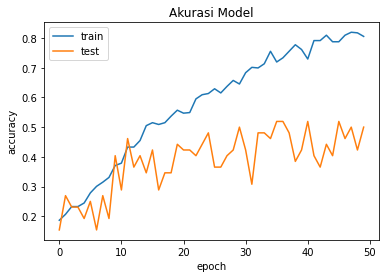

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Untuk membuat plot loss Anda cukup menjalankan kode berikut.

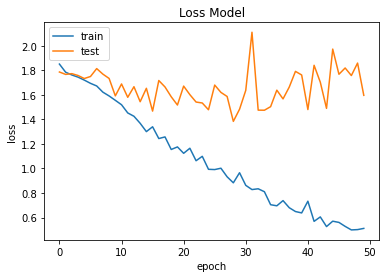

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Selamat, Anda berhasil mengembangkan model untuk mengklasifikasikan dataset yang sangat variatif. Akurasi yang didapat sekitar 50% di mana model akan membuat sekitar 50 persen prediksi yang salah. 

## **02. Image Augmentation**

Salah satu tantangan yang paling umum ditemui pada pengembangan model ML, khususnya pada kasus computer vision adalah terbatasnya data yang tersedia untuk pelatihan model. Ada beberapa cara yang dapat dipakai untuk mengatasi masalah tersebut. Salah satu cara tersebut adalah augmentasi gambar.

Augmentasi gambar adalah sebuah teknik yang sangat berguna di mana ia dapat memperbanyak data latih untuk model tanpa perlu mencari data yang baru. Kok bisa? Prinsip yang digunakan sederhana. Duplikasikan gambar yang telah ada dengan beberapa variasi sehingga data menjadi lebih banyak. Salah satu variasi tersebut contohnya adalah horizontal flip.

Seperti yang telah kita pelajari sebelumnya, keras menyediakan ImageDataGenerator yang memudahkan kita untuk melakukan augmentasi gambar pada dataset kita. Beberapa contoh augmentasi gambar yang dapat dilakukan dengan image data generator adalah:

* `Rescale` - contoh augmentasi ini yang pertama sekali kita temui. Rescale berfungsi untuk menormalisasi setiap nilai piksel pada gambar menjadi nilai antara 0 sampai 1.
* `Horizontal_flip` - Seperti contoh sebelumnya, horizontal flip berfungsi untuk membalikkan gambar secara horizontal
* `Vertical_flip` - Berkebalikan dengan horizontal flip, sesuai namanya vertical flip membalikkan gambar secara vertikal
* `Zoom_range` - melakukan augmentasi berupa zoom pada gambar 
Rotation_range - melakukan rotasi pada gambar secara acak

https://keras.io/api/preprocessing/image/

Cat :

melakukan augmentasi vertical flip malah dapat mengurangi performa model saat pelatihan karena model kemungkinan tidak dipakai untuk prediksi gambar anjing yang terbalik.

Terakhir, augmentasi gambar tidak boleh diaplikasikan pada data testing atau data validasi. Karena mengevaluasi kinerja model pada data yang telah di-augmentasi dapat seolah-olah membuat model telah memiliki prediksi yang bagus. 



## **03. Transfer Learning**

Pada masalah computer vision, kesuksesan model yang kita kembangkan secara signifikan dipengaruhi oleh jumlah data yang tersedia. Jumlah data yang sedikit cenderung akan mengakibatkan model kita overfit sehingga prediksi dari model hasilnya tidaklah bagus. Pada submodul sebelumnya kita telah mempelajari salah satu teknik untuk mengatasi jumlah data yang terbatas dengan augmentasi gambar. Selain augmentasi gambar, ada teknik lain yang dapat kita pakai ketika data yang kita miliki untuk pengembangan model terbatas yaitu, `transfer learning`.

Ide dibalik `transfer learning` untuk masalah computer vision adalah, model yang telah dilatih pada dataset berukuran besar yang berisi gambar umum mampu dipakai sebagai model dasar yang membantu kita untuk mengenali fitur/bentuk-bentuk benda yang terdapat di dunia nyata. Kita dapat memanfaatkan fitur-fitur yang dipelajari ini tanpa harus melakukan pelatihan model dari awal sekali.

Sederhananya, `transfer learning` menggunakan model yang telah dilatih sebelumnya pada dataset lain, untuk dipakai pada dataset kita sendiri. Masih ingat? Layer-layer awal dan di tengah dari sebuah model bertugas untuk mengenali bentuk-bentuk pada gambar. Misalnya pada model pengenalan wajah manusia, pada layer pertama mungkin mengenali garis, layer kedua mengenali lingkaran, layer ketiga mengenali mata, dan layer keempat mampu mengenali wajah. Nah, layer-layer telah dilatih tersebut dapat kita manfaatkan untuk dipakai pada dataset lain misalnya seperti dataset pengenalan ekspresi manusia. 

Untuk melihat bagaimana efektifnya `transfer learning`, kita akan belajar menggunakan `transfer learning` pada dataset cheesman yang kita pelajari pada submodul sebelumnya.

Chessman Image : 
[Github](https://github.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/blob/main/data/Chessman-image-dataset.zip)
 | [Kaggle](https://www.kaggle.com/nurimammasri/chessman-image-dataset)

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2021-10-01 05:28:29--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2021-10-01 05:28:29--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  96.4MB/s    in 

kita buat direktori untuk dataset kita untuk digunakan pada ImageDataGenerator.

In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

Bagi dataset menjadi data training dan data validasi.

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


Nah, disini kita mulai mengimplementasikan transfer learning. Untuk model yang kita pilih sebagai model dasar transfer learning adalah `ResNet152V2`. Model `ResNet152V2` memiliki sebanyak 152 layer dan tersedia di library keras. Kita dapat memanfaatkan fitur-fitur yang telah dipelajari oleh model tersebut untuk dipakai model kita. 

Untuk mengimplementasikan transfer learning sangatlah mudah seperti kode di bawah. Kita hanya perlu menambahkan 2 buah baris kode berbeda. Layer pertama pada model kita adalah model yang kita pakai untuk transfer learning. Kita cukup memanggil kelas `ResNet152V2` dan mengisi parameter sebagai berikut:

* `Weight` : ini adalah bobot atau parameter seperti yang telah dibahas pada kelas machine learning pemula. Untuk parameter weight kita mengisi nilai ‘imagenet’. Artinya kita ingin menggunakan model ResNet152V2 yang telah dilatih pada dataset imagenet. Imagenet adalah sebuah database raksasa yang berisi lebih dari 14 juta gambar.

* `Include_top` : parameter ini bernilai boolean. Maksud dari parameter ini apabila kita ingin tetap memakai layer terakhir/layer prediksi dari model resnet. Kita isi false karena kita memakai model resnet untuk memprediksi dataset chessman bukan imagenet.

* `Input_tensor` : sesuai namanya parameter ini menspesifikasikan ukuran dari input.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

234561536/234545216 [==============================] - 3s 0us/step


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 30s - loss: 8.3631 - accuracy: 0.4188 - val_loss: 1.4985 - val_accuracy: 0.6538
Epoch 2/50
63/63 - 14s - loss: 1.4879 - accuracy: 0.7174 - val_loss: 0.7538 - val_accuracy: 0.6154
Epoch 3/50
63/63 - 14s - loss: 1.0295 - accuracy: 0.7675 - val_loss: 0.7317 - val_accuracy: 0.7692
Epoch 4/50
63/63 - 14s - loss: 0.8965 - accuracy: 0.7615 - val_loss: 0.6952 - val_accuracy: 0.6538
Epoch 5/50
63/63 - 14s - loss: 0.6647 - accuracy: 0.8297 - val_loss: 0.8583 - val_accuracy: 0.7500
Epoch 6/50
63/63 - 14s - loss: 0.8379 - accuracy: 0.8116 - val_loss: 1.3809 - val_accuracy: 0.6731
Epoch 7/50
63/63 - 13s - loss: 0.6885 - accuracy: 0.8337 - val_loss: 0.6589 - val_accuracy: 0.7500
Epoch 8/50
63/63 - 13s - loss: 0.5867 - accuracy: 0.8657 - val_loss: 0.5712 - val_accuracy: 0.7692
Epoch 9/50
63/63 - 14s - loss: 0.5976 - accuracy: 0.8657 - val_loss: 1.0069 - val_accuracy: 0.7885
Epoch 10/50
63/63 - 14s - loss: 0.4563 - accuracy: 0.8818 - val_loss: 0.3566 - val_accuracy: 0.8654
Epoch 11/

Hasil yang didapat sangat jauh lebih signifikan dibanding melatih sendiri model dari awal. Akurasi dari model meningkat 40% menjadi 70 pada epoch terakhir. Hasil ini sangat luar biasa mengingat setiap kelas pada sampel kita sangat sedikit yaitu kurang dari 100 buah sampel.

## **04. Style Transfer**

`Neural style transfer` atau singkatnya `style transfer` adalah salah satu contoh aplikasi dari computer vision. Pada Style transfer, 2 buah gambar yaitu satu gambar original, dan satu gambar dari gaya yang kita inginkan akan digabungkan menjadi gambar baru.

Mengimplementasikan style transfer menjadi sangat mudah menggunakan `Tensorflow Hub`. Tensorflow Hub adalah portal yang menyediakan model-model machine learning yang sudah dilatih dan dapat dipakai untuk transfer learning. Ada 3 domain model yang disediakan di tensorflow hub antara lain, computer vision, natural language processing, serta video classification. Untuk lebih lengkap mengenai tensorflow hub, silakan mengunjungi tautan ini.

http://tfhub.dev/

Hal yang paling pertama kita lakukan adalah membuat fungsi untuk mengubah tensor menjadi gambar. Kita perlu mengubah tensor menjadi gambar karena, model yang kita gunakan dari tensorflow hub akan mengembalikan nilai dengan format tensor. Kode di bawah adalah fungsi untuk mengubah tensor menjadi gambar. Ingat bahwa tensor adalah kumpulan data dalam N dimensi. Contohnya matriks adalah tensor 2 dimensi.

In [ ]:
import tensorflow as tf
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

Selain mengembalikan nilai dalam bentuk tensor, model yang akan kita pakai dari tensorflow hub juga menerima masukan berupa tensor. Sehingga kita harus mengubah gambar yang akan kita pakai menjadi tensor terlebih dahulu. Kode di bawah adalah fungsi untuk mengubah gambar menjadi tensor.

In [ ]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [512, 512])
    img = img[tf.newaxis, :]
    return img

Kemudian Anda masukkan gambar kucing dan lukisan tadi ke dalam Colab.

https://pypi.org/project/gdown/

In [ ]:
# !gdown https://drive.google.com/uc?id=12CkmzGvimgMQN-MA8I0QbCLFoQXdzxEC
# !gdown https://drive.google.com/uc?id=1eALw7yLGVK745DTKCY7OKYeTaD7f93ls

In [ ]:
# kucing.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/kucing.jpg \
    -O /content/kucing.jpg

# style.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/style.jpg \
    -O /content/style.jpg

--2021-10-01 05:40:44--  https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/kucing.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39201 (38K) [image/jpeg]
Saving to: ‘/content/kucing.jpg’

/content/kucing.jpg 100%[===================>]  38.28K  --.-KB/s    in 0.008s  

2021-10-01 05:40:45 (4.72 MB/s) - ‘/content/kucing.jpg’ saved [39201/39201]

--2021-10-01 05:40:45--  https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/style.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.

Nah, lalu kita konversi gambar yang kita unggah pada Colaboratory tadi menjadi dalam bentuk tensor.

In [ ]:
kucing_tensor = image_to_tensor('/content/kucing.jpg')
style_tensor = image_to_tensor('/content/style.jpg')

Terakhir, jalankan kode di bawah untuk melakukan style transfer pada gambar kita dan menampilkan hasilnya.

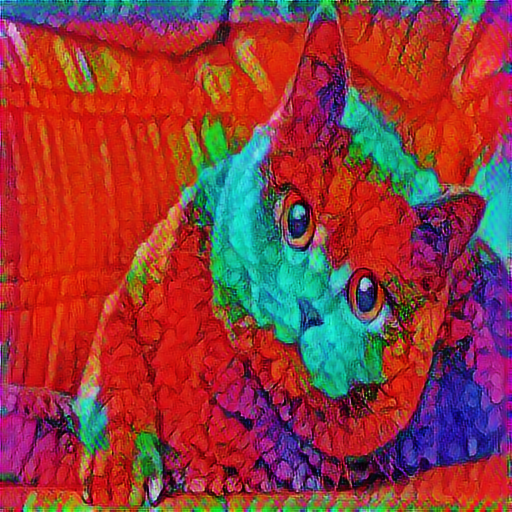

In [ ]:
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(kucing_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)

## **Notes**

[Submission 03 - Animals (4 class) - Image Classification (TFLite) [Fix].ipynb](https://colab.research.google.com/drive/1TA9KD8QDOh6XJ4L-3InX0qUe_V49G7rQ#scrollTo=Lme6p3RD_VqG)

* Karena probabilitas salah satu kelas/label dari model dengan layer ber-activation softmax belum tentu 1, maka langkah terbaik adalah dengan mengecek mana probabilitas yang paling tinggi. Bisa dibuat menggunakan logika if else, atau menggunakan modul numpy.argmax

```
prediksi = np.argmax(classes)
```

pada variable prediksi akan terdapat angka/integer tertinggi yang merepresentasikan kelas/labelnya. Bisa di cek pada variable train_generator.class_indices

* Pada variable train_datagen  dan test_datagen, sebelum gambar di feed ke model kamu menormalisasikan terlebih dahulu gambarnya. Sehingga sebaiknya dibagian prediksi juga kamu perlu melakukan hal yang sama. Setelah mengubah gambar menjadi array. Array tersebut perlu di normalisasi dengan kode berikut :

```
x /= 255
```

* Beberapa referensi tambahan berikut akan semakin menambah skill kamu dalam menggunakan TensorFlow untuk Image Classification :

    * Pelajari cara download Kaggle dataset pada colab menggunakan [Kaggle API](https://www.kaggle.com/general/51898)

    * Pelajari penggunaan [Augmentasi](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/) gambar

    * Pelajari teknik transfer learning [InceptionV3](https://github.com/lmoroney/dlaicourse/blob/master/Exercises/Exercise%207%20-%20Transfer%20Learning/Exercise%207%20-%20Answer.ipynb)

    * Pelajari penggunaan [Padding dan Stride](https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/) pada layer convolution

    * Pelajari penggunaan [Dropout Regularization](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)

    * Pelajari Penggunaan [Custom Callback](https://keras.io/guides/writing_your_own_callbacks/)

    * Pelajari penggunaan callback function untuk memplot hasil training model dengan [tensorboard](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks#tensorboard_in_notebooks) 

    * Pelajari penggunaan [LearningRateScheduler](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)

    * Pelajari penggunaan [EarlyStopping](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)

    * Pelajari cara [tweak learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

    * Pelajari penggunaan [Plot](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/) akurasi dan loss

# **Modul 6 : Natural Language Processing (NLP) dengan Tensorflow**

Selamat datang pada modul NLP. Pada modul ini kita akan belajar mengembangkan model ml untuk pemrosesan bahasa manusia. Berbeda dengan pemrosesan gambar yang telah kita pelajari, pemrosesan teks memiliki tantangan tersendiri seperti perbedaan panjang teks, bahasa, serta bagaimana merepresentasikan teks ke dalam format yang dapat diterima oleh sebuah model.

Materi yang akan dibahas pada modul ini antara lain:

* Penggunaan Tokenizer
* Implementasi Embedding
* Layer LSTM
* Klasifikasi teks 2 kelas dan multi-kelas

## **01. Pengenalan Tokenisasi dan Sequences**

Proses mengonversi kata-kata ke dalam bilangan numerik dapat kita sebut juga sebagai `tokenisasi`. 

Setelah melakukan tokenisasi pada teks, hal selanjutnya adalah mengubah setiap kalimat dalam teks kita ke dalam `sequence`. Sebuah sekuens adalah sebuah larik yang berisi kumpulan token sesuai dengan setiap kata pada sebuah kalimat dalam teks.

Proses untuk mengubah setiap sequence agar memiliki panjang yang sama adalah `padding`. Pada padding, setiap sequence dibuat sama panjang dengan menambahkan nilai 0 secara sufiks atau prefiks hingga mencapai panjang maksimum sequence. Selain itu padding juga dapat memotong sequence hingga panjangnya sesuai dengan panjang maksimum sequence.

**Latihan Tokenization**

Untuk menggunakan tokenizer, impor library di bawah.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

Kemudian buat objek tokenizer dengan memanggil fungsi tokenizer dan melengkapi parameternya. Parameter num_words adalah jumlah kata yang akan dikonversi ke dalam token/bilangan numerik. Jika parameter num_words diisi 15, maka hanya 15 huruf yang paling sering muncul akan ditokenisasi dari seluruh kata pada dataset. 

Sedangkan parameter oov_token adalah parameter yang berfungsi untuk mengganti kata-kata yang tidak ditokenisasi menjadi karakter tertentu. Pada praktiknya, lebih baik untuk mengganti kata yang tidak dikenali dengan suatu kata tertentu dibanding melewatkan kata tersebut untuk mengurangi informasi yang hilang. Hal inilah yang dapat dilakukan dengan menambahkan parameter OOV.

In [ ]:
tokenizer = Tokenizer(num_words= 15, oov_token='-')

Lalu, buat teks yang akan kita tokenisasi dan kita pakai untuk pelatihan model. 

In [ ]:
teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

Untuk melakukan tokenisasi, panggil fungsi fit_on_text() pada objek tokenizer dan isi teks kita sebagai argumennya.

In [ ]:
tokenizer.fit_on_texts(teks)

Kemudian, kita akan mengubah kalimat ke dalam nilai yang sesuai dengan fungsi texts_to_sequences.

In [ ]:
sequences = tokenizer.texts_to_sequences(teks)

Untuk melihat hasil tokenisasi, kita bisa memanggil atribut word_index dari objek tokenizer. atribut word index mengembalikan dictionary berupa kata sebagai key dan token atau nilai numeriknya sebagai value. Perlu diperhatikan bahwa tanda baca dan huruf kapital tidak diproses oleh tokenizer. Contohnya kata “Selamat!” dan “SELAMAT” akan diperlakukan sebagai kata yang sama. Hasil dari cell di bawah menunjukkan bahwa kata-kata yang out-of-vocabulary akan diberi token bernilai 1. 

In [ ]:
tokenizer.word_index

{'-': 1,
 'berbeda': 9,
 'dengan': 10,
 'konvensional': 12,
 'learning': 8,
 'machine': 7,
 'menyenangkan': 6,
 'pemrograman': 11,
 'programming': 2,
 'sangat': 5,
 'saya': 3,
 'suka': 4}

In [ ]:
print(tokenizer.word_index)

{'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


Contoh OOV seperti di bawah. Kata ‘belajar’, ‘sejak’, dan ‘SMP’ tidak ada memiliki token pada dictionary hasil tokenisasi. Tanpa OOV, sequence yang dihasilkan akan seperti output pada baris pertama di mana, kata yang tidak memiliki token tidak dimasukkan pada sequence. Jika kita menggunakan OOV, maka setiap kata yang tidak memiliki token akan diberikan token yang seragam. Dengan OOV, informasi urutan setiap kata pada kalimat tidak hilang.

In [ ]:
print(tokenizer.texts_to_sequences(['Saya suka programming']))
print(tokenizer.texts_to_sequences(['Saya suka belajar programming sejak SMP']))

[[3, 4, 2]]
[[3, 4, 1, 2, 1, 1]]


Setelah tokenisasi, untuk mengubah kalimat ke dalam nilai-nilai yang sesuai dapat dengan menggunakan fungsi text_to_sequence() dan masukkan parameter dari teks kita. Ketika sequence telah dibuat, hal yang perlu kita lakukan adalah padding. Yup, padding adalah proses untuk membuat setiap kalimat pada teks memiliki panjang yang seragam. Sama seperti melakukan resize gambar, agar resolusi setiap gambar sama besar. Untuk menggunakan padding impor library pad_sequence. Kemudian buat panggil fungsi pad_sequence() dan masukkan sequence hasil tokenisasi sebagai parameternya.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)

Hasil setelah padding adalah setiap sequence memiliki panjang yang sama. Padding dapat melakukan ini dengan menambahkan 0 secara default pada awal sequence yang lebih pendek

In [ ]:
print(sequences_samapanjang)

[[ 0  0  0  3  4  2]
 [ 0  0  0  2  5  6]
 [ 7  8  9 10 11 12]]


Jika kita ingin merubah sehingga 0 ditambahkan di akhir sequence, kita dapat menggunakan parameter padding dengan nilai ‘post’. Selain itu kita dapat mengatur berapa maksimum panjang setiap sequence dengan parameter maxlen dan nilai yang kita inginkan. Jika kita mengisi nilai 5, maka panjang sebuah sequence tidak akan melebihi 5. 

In [ ]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5)

In [ ]:
print(sequences_samapanjang)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 8  9 10 11 12]]


Jika teks kita memiliki panjang lebih dari nilai parameter maxlen misalnya 5, maka secara default nilai dari sequence akan diambil 5 nilai terakhir atau 5 kata terakhir saja dari setiap kalimat. Untuk mengubah pengaturan ini dan mengambil 5 kata terakhir dari tiap kalimat, kita dapat menggunakan parameter truncating dan mengisi nilai ‘post’.

In [ ]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')

In [ ]:
print(sequences_samapanjang)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 7  8  9 10 11]]


## **02. Embedding**

Pada submodul sebelumnya kita telah belajar bagaimana mengubah teks menjadi sequence berisi nilai-nilai yang merepresentasikan setiap kata pada kalimat. Lalu apa tahapan lanjut yang perlu kita lakukan dalam klasifikasi NLP?

Pada klasifikasi teks, kita perlu melakukan embedding yang merupakan kunci dalam klasifikasi teks di Tensorflow. Embedding memungkinkan model ML untuk memahami makna di setiap kata dan mengelompokkan kata-kata dengan makna yang mirip agar berdekatan. Misalnya komentar pada sebuah video youtube, di mana kata-kata “menarik”, “keren”, dan “luar biasa” akan dikelompokkan berdekatan. Pengelompokkan ini dapat dicapai dengan memetakan setiap kata ke dalam vektor atau larik. Di mana kata yang mirip akan memiliki nilai vektor yang mirip. 

Makna dari sebuah kata didapat dari label dari data tersebut. Misalnya pada teks yang berlabel negatif terdapat banyak kata ‘membosankan’, dan ‘jelek’. Maka kedua kata tersebut memiliki makna yang mirip sehingga nilai vektor mereka mirip. Informasi lebih detail mengenai Embedding dapat Anda lihat pada tautan berikut

https://www.tensorflow.org/tutorials/text/word_embeddings

Untuk mengimplementasikan Embedding pada Keras juga sangatlah mudah. Pada model sequential, kita tinggal memanggil fungsi Embedding() dan mengisi parameter total kata yang di tokenisasi, panjang kalimat, serta dimensi embedding yang diinginkan. Karena hasil dari embedding merupakan larik 2 dimensi yang berisi panjang setiap kalimat, dan dimensi embedding, maka kita memerlukan fungsi flatten().

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(jumlah_kata, dimensi_embedding, panjang_input),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

Setelah mengimplementasikan Embedding pada model sekuensial kita, panggil fungsi compile. Untuk optimizer, kita dapat menggunakan optimizer yang telah kita pelajari sebelumnya. Sedangkan loss disesuaikan dengan kelas yang terdapat pada dataset. 

In [ ]:
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

Untuk fungsi fit, kita memerlukan parameter teks yang telah di-padding, label dari data training, jumlah epoch, serta data validasi. Mudah bukan.

In [ ]:
# model.fit(padded_latih, label_latih, 
#           epochs=num_epochs, 
#           validation_data=(padded_test, label_test))

## **03. Binary Text Classification**

Sebelumnya kita telah belajar bagaimana melakukan tokenisasi dan membuat sequence dari setiap kalimat pada teks. Bayangkan jika Anda memiliki restoran dan Anda memiliki ratusan ribu review pelanggan. Anda menginginkan agar membedakan antara review positif dan negatif menjadi terotomasi sehingga Anda dapat memfilter review pelanggan dengan mudah. Pada submodul ini kita akan latihan untuk masalah ini. 

Untuk latihan kali ini kita akan menggunakan dataset Yelp yang berisi review dari beberapa restoran di Amerika Serikat. Dataset terdiri dari 2 kelas yaitu 0 dan 1 yang menunjukkan apakah review tersebut positif atau negatif. Dataset dapat diunduh pada tautan ini yah. 

https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set?

In [ ]:
# yelp_labelled.txt
# import pandas as pd
# df = pd.read_csv('https://drive.google.com/uc?id=1G16ZoQ6kayls1wZJyC31F_kZ0U2qadnG', names=['sentence', 'label'], sep='\t')

In [ ]:
# yelp_labelled.txt
!wget --no-check-certificate \
    https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/yelp_labelled.txt \
    -O /content/yelp_labelled.txt

--2021-10-01 05:40:51--  https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/yelp_labelled.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61327 (60K) [text/plain]
Saving to: ‘/content/yelp_labelled.txt’

/content/yelp_label 100%[===================>]  59.89K  --.-KB/s    in 0.02s   

2021-10-01 05:40:51 (2.41 MB/s) - ‘/content/yelp_labelled.txt’ saved [61327/61327]



In [ ]:
import pandas as pd
df = pd.read_csv('yelp_labelled.txt', names = ['sentence', 'label'], sep = '\t')

In [ ]:
df.tail()

,sentence,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


Setelah itu kita bagi dataset menjadi train dan test set.

In [ ]:
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

Agar teks dapat dipahami oleh model, kita harus lakukan tokenisasi. Gunakan fungsi tokenizer pada data latih dan data test. Jangan lupa gunakan fungsi pad_sequences agar setiap sequence sama panjang.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

Untuk arsitektur yang akan digunakan adalah layer embedding, dengan argumen pertama sesuai dengan jumlah vocabulary/kata yang kita pakai pada tokenizer. Argumen selanjutnya adalah dimensi embedding, dan input_length yang merupakan panjang dari sequence. Nah di kita tidak menggunakan layer Flatten melainkan kita menggantinya dengan GlobalAveragePooling1D. Fungsi ini bekerja lebih baik pada kasus NLP dibanding Flatten.

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Setelah arsitektur model dibentuk, dan loss function serta optimizer ditentukan, kita dapat memulai pelatihan model kita. Di sini penulis menggunakan 30 epoch. Anda bebas bereksperimen dengan nilai yang lain.

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30


25/25 - 1s - loss: 0.6930 - accuracy: 0.4925 - val_loss: 0.6927 - val_accuracy: 0.6000
Epoch 2/30
25/25 - 0s - loss: 0.6919 - accuracy: 0.5387 - val_loss: 0.6921 - val_accuracy: 0.5650
Epoch 3/30
25/25 - 0s - loss: 0.6900 - accuracy: 0.5300 - val_loss: 0.6914 - val_accuracy: 0.4900
Epoch 4/30
25/25 - 0s - loss: 0.6872 - accuracy: 0.6087 - val_loss: 0.6890 - val_accuracy: 0.6200
Epoch 5/30
25/25 - 0s - loss: 0.6827 - accuracy: 0.6662 - val_loss: 0.6853 - val_accuracy: 0.6200
Epoch 6/30
25/25 - 0s - loss: 0.6753 - accuracy: 0.6787 - val_loss: 0.6795 - val_accuracy: 0.6500
Epoch 7/30
25/25 - 0s - loss: 0.6646 - accuracy: 0.6862 - val_loss: 0.6722 - val_accuracy: 0.6500
Epoch 8/30
25/25 - 0s - loss: 0.6507 - accuracy: 0.7075 - val_loss: 0.6617 - val_accuracy: 0.6700
Epoch 9/30
25/25 - 0s - loss: 0.6328 - accuracy: 0.7237 - val_loss: 0.6489 - val_accuracy: 0.6900
Epoch 10/30
25/25 - 0s - loss: 0.6121 - accuracy: 0.7275 - val_loss: 0.6329 - val_accuracy: 0.7100
Epoch 11/30
25/25 - 0s - loss:

## **04. LSTM Layer**

Sebelumnya kita telah belajar mengenai embedding untuk mengelompokkan kata yang memiliki kemiripan makna. Namun pada klasifikasi teks, kita tidak dapat hanya memahami sebuah kalimat berdasarkan kata-kata saja. Misalnya kalimat “Saya suka programming”, dan “Saya tidak suka programming”, sama-sama memiliki kata suka di dalamnya namun, makna kedua kalimat tersebut berlawanan. Jadi urutan kata-kata juga sangat berpengaruh dalam arti sebuah kalimat. Nah di submodul ini kita akan belajar teknik baru yaitu LSTM untuk mengatasi masalah sebelumnya.

Teori di balik LSTM sangatlah rumit seperti di atas. Namun kita akan menggunakan contoh sederhana yang mudah Anda pahami. Bayangkan kalimat berikut.

“Di Indonesia, salah satu olahan nasi paling populer adalah nasi...”

Anda kemungkinan akan menjawab nasi goreng. Kenapa Anda menjawab seperti itu? Karena adanya petunjuk pada kata Indonesia dan populer. Dapat kita lihat bahwa konteks dari sebuah kata, dipengaruhi oleh kata-kata yang mendahuluinya. Jaringan saraf dapat melakukan hal ini dengan menggunakan LSTM. Long Short Term Memory (LSTM) adalah teknik yang umum digunakan dalam pemrosesan bahasa alami yang memungkinkan agar model dapat memahami makna sebuah kalimat berdasarkan urutan kata, seperti pada contoh nasi goreng kita.

Untuk mengimplementasikan LSTM sendiri sangatlah mudah pada Keras. Kita cukup menambahkan layer LSTM dan mengisi parameter dengan jumlah output yang diinginkan dari layer tersebut. Contoh penggunaan LSTM dapat dilihat pada kode di bawah. Kita dapat meletakkan layer LSTM setelah layer embedding dan sebelum Dense layer.

```
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
```
Nah di submodul selanjutnya kita akan latihan menggunakan layer LSTM untuk klasifikasi teks multi-kelas.

## **05. Multiclass Text Classification**

Pada latihan kali ini kita akan melakukan klasifikasi teks multikelas menggunakan lstm.

Pada latihan ini kita akan menggunakan dataset yang berisi sinopsis dari beberapa film Indonesia dan genrenya. Tujuan kita adalah menentukan genre sebuah film berdasarkan sinopsisnya. Dataset dapat Anda unduh pada tautan berikut.

https://www.kaggle.com/antoniuscs/imdb-synopsis-indonesian-movies

Pada cell pertama impor library pandas dan ubah dataset menjadi dataframe. Kemudian buang kolom 'judul_film' karena kita hanya akan menggunakan sinopsis sebagai atribut untuk dilatih pada model.

In [ ]:
import pandas as pd
# imdb_indonesian_movies_2.csv
# df = pd.read_csv('imdb_indonesian_movies_2.csv')
df = pd.read_csv('https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/imdb_indonesian_movies_2.csv')
df = df.drop(columns = ['judul_film'])

In [ ]:
df.head()

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [ ]:
df['genre'].unique()

array(['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis'], dtype=object)

Karena label kita berupa data kategorikal, maka kita perlu melakukan proses one-hot-encoding. Jalankan kode di bawah untuk melakukan one-hot-encoding dan membuat dataframe baru.

In [ ]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [ ]:
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

Lalu, bagi data untuk training dan data untuk testing.

In [ ]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

Kemudian kita ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, kita perlu membuat mengonversi setiap sampel menjadi sequence.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih) 
tokenizer.fit_on_texts(sinopsis_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

Untuk arsitektur model kita menggunakan layer Embedding dengan dimensi embedding sebesar 16, serta dimensi dari input sebesar nilai num_words pada objek tokenizer. Jangan lupa panggil fungsi compile dan tentukan optimizer serta loss function yang akan dipakai oleh model.

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
26/26 - 8s - loss: 1.6101 - accuracy: 0.1828 - val_loss: 1.6094 - val_accuracy: 0.1891
Epoch 2/30
26/26 - 5s - loss: 1.6063 - accuracy: 0.2848 - val_loss: 1.6074 - val_accuracy: 0.2338
Epoch 3/30
26/26 - 5s - loss: 1.5693 - accuracy: 0.3172 - val_loss: 1.5872 - val_accuracy: 0.2637
Epoch 4/30
26/26 - 5s - loss: 1.4302 - accuracy: 0.3570 - val_loss: 1.5954 - val_accuracy: 0.2537
Epoch 5/30
26/26 - 5s - loss: 1.1699 - accuracy: 0.4813 - val_loss: 2.1789 - val_accuracy: 0.2687
Epoch 6/30
26/26 - 5s - loss: 0.8644 - accuracy: 0.7400 - val_loss: 2.0010 - val_accuracy: 0.2935
Epoch 7/30
26/26 - 5s - loss: 0.4668 - accuracy: 0.8470 - val_loss: 2.2673 - val_accuracy: 0.3284
Epoch 8/30
26/26 - 5s - loss: 0.2784 - accuracy: 0.9117 - val_loss: 2.5532 - val_accuracy: 0.3532
Epoch 9/30
26/26 - 5s - loss: 0.1171 - accuracy: 0.9664 - val_loss: 3.0713 - val_accuracy: 0.3333
Epoch 10/30
26/26 - 5s - loss: 0.0447 - accuracy: 0.9925 - val_loss: 3.3600 - val_accuracy: 0.3333
Epoch 11/30
26/26 -

Akurasi dari model kita menunjukkan terjadinya overfitting karena akurasi pada data testing sangat besar, sedangkan akurasi pada data validasi jauh lebih kecil. Hal ini masih sangat luar biasa karena kita hanya memiliki 1000 buah sampel data!

https://www.kaggle.com/kazanova/sentiment140

https://www.kaggle.com/vstepanenko/disaster-tweets

https://www.kaggle.com/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text?select=data.csv

https://www.kaggle.com/thomaskonstantin/highly-rated-children-books-and-stories

https://www.kaggle.com/chandramoulinaidu/spam-classification-for-basic-nlp

https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

https://www.kaggle.com/adi996/covid-19-tweets-sentiment-prediction-lstm


## **Notes**

[Submission 01 - BBC News - NLP [Fix].ipynb](https://colab.research.google.com/drive/1EXkvEwZejfToNsBfq8i8pgJ9YH0UCGbb#scrollTo=DH_GBWDRpzgf)

* Train accuracy yang didapat mencapai 99% dan validation accuracy 95% hal ini menandakan adanya indikasi overfitting. Untuk mengatasi overfitting anda  menggunakan pretrained word embedding.

* Agar memperluas pengetahuan anda di bidang machine learning, berikut beberapa tambahan tutorial yang bisa anda gunakan dalam membangun dan meningkatkan model NLP:

    * Pelajari cara download Kaggle dataset pada colab menggunakan [Kaggle API](https://www.kaggle.com/general/51898)

    * Pelajari [Text Preprocessing](https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html) untuk dapat memiliki dataset yang bersih

    * Pelajari penggunaan pre-trained word embedding [GloVe](https://keras.io/examples/nlp/pretrained_word_embeddings/#load-pretrained-word-embeddings) [Example](https://ichi.pro/id/memprediksi-berita-palsu-menggunakan-nlp-dan-machine-learning-scikit-learn-glove-keras-lstm-136053113238595) [Example 2](https://nroy0110.medium.com/)

    * Anda bisa terapkan penggunaan layer [Bidirectional LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)

    * Pelajari Penggunaan [Custom Callback](https://keras.io/guides/writing_your_own_callbacks/)

    * Pelajari penggunaan callback function untuk memplot hasil training model dengan [tensorboard](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks#tensorboard_in_notebooks) 

    * Pelajari penggunaan [LearningRateScheduler](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)

    * Pelajari penggunaan [EarlyStopping](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)

    * Pelajari cara [tweak learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

    * Tips mengatasi overfitting/underfitting pada NLP : [video](https://www.youtube.com/watch?v=yxUVu0iN26Q)

# **Modul 7 : Time Series**

## **01. Data Preprocessing untuk Time Series**

Setelah kita mengenal jenis-jenis time series, kita dapat mulai praktik mengimplementasi ML pada time series. Hal yang pertama yang perlu kita lakukan adalah membagi data time series menjadi data training dan testing. 

Pembagian data pada time series dilakukan dengan membaginya menjadi ke dalam 2 periode yakni periode training dan periode validation. Dengan membagi data seperti ini kita mendapat gambaran prediksi dari model.

![alt text](https://drive.google.com/uc?id=1rG5cVkqG9X5wBbzYl9xweIQle8und5qa)

Perhatikan saat  membagi data khususnya pada time series yang bersifat seasonal. Data harus dibagi sesuai musim yang ada. Contohnya data penjualan bulanan. Untuk periode training dan validation, datanya harus dalam satuan bulanan bukan mingguan atau harian. Misalnya untuk periode validasi, gunakan data 2 bulan terakhir, bukan data 3 minggu terakhir.

Kemudian, sama seperti kasus ML pada umumnya, kita harus membagi data kita menjadi atribut dan label. Bagaimana kita melakukannya? Pertama kita mengambil sebagian kecil dari data, yang dapat disebut window. Sebuah window dapat berisi sebanyak N data, atau ukuran window dapat kita tentukan sebesar interval waktu tertentu misalnya satu minggu, atau 4 hari. 

![alt text](https://drive.google.com/uc?id=1KhBWXuXF71kVmkz5VgBTRHffmcdml8ul)

Misalnya kita menentukan ukuran window sebesar 7 buah data. Nah, fitur-fitur pada window tersebut adalah setiap nilai pada window, dan labelnya adalah nilai selanjutnya. Contohnya kita memiliki 7 buah data 1,2,3,4,5,6,7. Lalu ukuran window yang kita pilih adalah 3. Fitur dan label untuk window tersebut ditampilkan pada tabel di bawah. Perhatikan bahwa fitur 6 dan 7 tidak dimasukkan karena kedua fitur tersebut tidak ada nilai setelah 7.

![alt text](https://drive.google.com/uc?id=1oXs2Pk6IbJtQKW_4nXTWI-OtxX53eDRf)


## **02. Metrik Evaluasi untuk Model Time Series**

Untuk mengevaluasi model time series, kita dapat menghitung eror yang dibuat pada model seperti kita mengevaluasi model regresi. Yup kita dapat mendapatkan eror dengan menghitung jarak antara nilai prediksi model dan nilai sebenarnya.

![alt text](https://drive.google.com/uc?id=1YQyKUiBSCp0ihzaqKWPKaEkgDKvNywNt)

Ada beberapa metrik yang dapat dipakai dalam evaluasi model time series yaitu:

![alt text](https://drive.google.com/uc?id=1k24gpEUQ5ZhBje14gaauEUBv5_OoJTXR)

Di antara metrik-metrik di atas, mse atau mean square error adalah metrik yang sangat populer. Pada MSE kita mempangkatkan seluruh eror, kemudian menghitung rata-ratanya. Kenapa dipangkatkan? Karena eror yang bernilai negatif dapat diubah menjadi positif. Bayangkan jika kita memiliki eror katakanlah 2 dan -2. Jika kita menjumlahkan kedua eror tersebut, hasilnya adalah 0 yang menunjukkan bahwa tidak ada eror. Dengan mempangkatkan 2 dan -2, nilai tersebut menjadi 4 dan 4. Ketika menjumlahkannya, eror kita bukan 0.

Selain itu ada juga MAE atau mean absolute error, di mana alih-alih mempangkatkan nilai, pada MAE setiap nilai diambil nilai absolutnya sehingga nilai negatif hilang.

Untuk melihat MAE pada saat pelatihan model, kita cukup mengganti nilai dari parameter metrich pada fungsi compile menjadi "mae".

```
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
```

Dalam sebuah metode pembelajaran machine learning penting untuk dilakukan. Hal itu disebabkan karena bertujuan untuk mengukur tingkat keakuratan kinerja metode yang digunakan. Untuk itu maka pada tahap ini salah satu metode yang perlu dilakukan untuk mengukur kinerja suatu algoritma, yaitu dengan menghitung `Root Mean Square Error (RMSE), Mean Square Error (MSE) dan Mean Absolute Error (MAE)`.

```
Y ' = Nilai Prediksi 
Y   = Nilai Sejati
n    = Jumlah Data
```

* `Root Mean Square Error (RMSE)`

`Root Mean Square Error (RMSE)`, adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan. Rumus formula RMSE adalah sebagai berikut :

![alt text](https://drive.google.com/uc?id=1srMLL-dySgaN4-C9oO1rfdFJ6PiG4McQ)

* `Mean Square Error (MSE)`

`Root Mean Square Error (RMSE)`, adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan. Rumus formula RMSE adalah sebagai berikut :

![alt text](https://drive.google.com/uc?id=1B2VjNY078w9bLG66UIo4c4lJxOH_0Lrx)


* `Mean Absolute Error (MAE)`

MAE atau Mean Absolute Error menunjukkan nilai kesalahan rata-rata yang error dari nilai sebenarnya dengan nilai prediksi. MAE sendiri secara umum digunakan untuk pengukuran prediksi error pada analisis time series.  Rumus dari MAE sendiri didefinisikan sebagai berikut :

![alt text](https://drive.google.com/uc?id=1Aa8aIXxMJNMK-Jz6tuDQ00ma5udjTgTF)

* `Mean Precentage Absolute Error (MAPE)`

Sebenarnya nilai ini adalah lanjutan dari penentuan nilai MAE dengan menentukan nilai presentase yang dihasilkan. Formula dari rumus MAPE sendiri adalah sebagai berikut ;

![alt text](https://drive.google.com/uc?id=1Inb0jNx12Jp5yiRBPsxY5z3MbOAmWinp)


## **03. Latihan Time Series dengan LSTM**

Untuk latihan kali ini kita akan menggunakan dataset cuaca kota Delhi pada tahun 2013 sampai 2017. Silakan unduh data tersebut pada tautan berikut. 

https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data

Kita akan mengembangkan model yang dapat memprediksi cuaca.

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# DailyDelhiClimateTrain.csv
# data_train = pd.read_csv('https://drive.google.com/uc?id=1BZFj3p-GfATFfBcpf0BatF6qtX5GY5Hk')
data_train = pd.read_csv('https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/DailyDelhiClimateTrain.csv')
# data_train = pd.read_csv('DailyDelhiClimateTrain.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Kita dapat mengecek apakah ada nilai yang hilang dari dataset menggunakan fungsi isnull().

In [ ]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Untuk membuat plot dari data kita dapat menggunakan fungsi plot dari library matplotlib. Dapat dilihat dari output cell yang kita jalankan menunjukkan bahwa data kita merupakan time series yang bersifat musiman.

In [ ]:
dates = data_train['date'].values
temp  = data_train['meantemp'].values

In [ ]:
dates

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2016-12-30', '2016-12-31', '2017-01-01'], dtype=object)

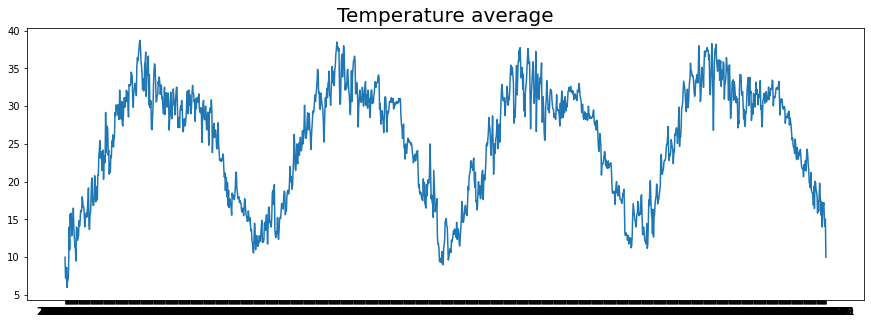

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

Tuliskan fungsi di bawah yang dapat merubah data kita menjadi format yang dapat diterima oleh model. Fungsi di bawah menerima sebuah series/atribut kita yang telah di konversi menjadi tipe numpy, lalu mengembalikan label dan atribut dari dataset dalam bentuk batch.

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

Selanjutnya untuk arsitektur model gunakan 2 buah layer LSTM. Ketika menggunakan 2 buah layer LSTM, perhatikan bahwa layer pertama harus memiliki parameter return_sequences yang bernilai True.

In [ ]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

Lalu pada optimizer, kita akan menggunakan parameter learning rate dan momentum seperti di bawah. Penjelasan dan praktik learning rate akan dibahas lebih detail pada submodul selanjutnya. Loss function yang dapat dicoba untuk ini adalah Huber yang merupakan salah satu loss function yang umum digunakan pada kasus time series.  Serta metrik yang digunakan untuk mengevaluasi model adalah MAE.

Hasil dari pelatihan model adalah sebagai berikut yang menunjukkan model memiliki MAE yang relatif rendah dibandingkan skala data.

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
15/15 [==============================] - 5s 35ms/step - loss: 25.1257 - mae: 25.6257
Epoch 2/100
15/15 [==============================] - 1s 32ms/step - loss: 24.8525 - mae: 25.3525
Epoch 3/100
15/15 [==============================] - 1s 33ms/step - loss: 24.5681 - mae: 25.0681
Epoch 4/100
15/15 [==============================] - 1s 32ms/step - loss: 24.2945 - mae: 24.7945
Epoch 5/100
15/15 [==============================] - 1s 32ms/step - loss: 24.0099 - mae: 24.5099
Epoch 6/100
15/15 [==============================] - 1s 33ms/step - loss: 23.7020 - mae: 24.2020
Epoch 7/100
15/15 [==============================] - 1s 33ms/step - loss: 23.3520 - mae: 23.8520
Epoch 8/100
15/15 [==============================] - 1s 32ms/step - loss: 22.9405 - mae: 23.4405
Epoch 9/100
15/15 [==============================] - 1s 32ms/step - loss: 22.4418 - mae: 22.9418
Epoch 10/100
15/15 [==============================] - 1s 31ms/step - loss: 21.8104 - mae: 22.3104
Epoch 11/100
15/15 [=========

## **04. Resource Tambahan**

https://github.com/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%203%20Lesson%204%20-%20LSTM.ipynb

## **05. Learning Rate Scheduler**

Downloading: daily-min-temperatures.csv


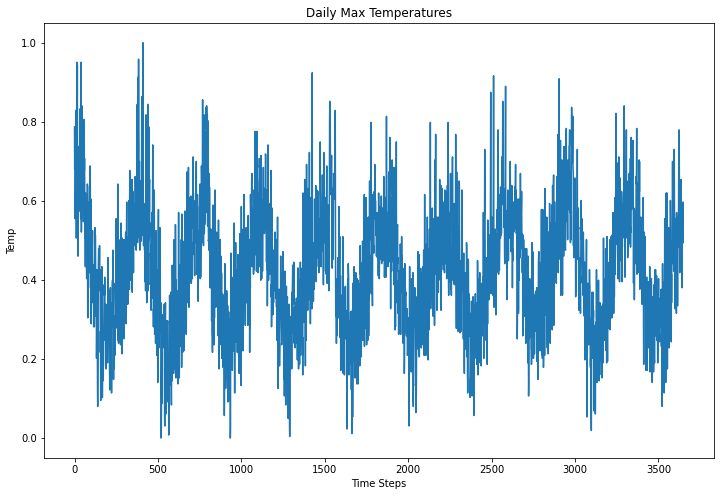

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(2500,)
Epoch 1/100
10/10 - 10s - loss: 0.0367 - mae: 0.2162 - val_loss: 0.0189 - val_mae: 0.1566
Epoch 2/100
10/10 - 1s - loss: 0.0136 - mae: 0.1319 - val_loss: 0.0122 - val_mae: 0.1273
Epoch 3/100
10/10 - 1s - loss: 0.0125 - mae: 0.1258 - val_loss: 0.0113 - val_mae: 0.1237
Epoch 4/100
10/10 - 1s - loss: 0.0117 - mae: 0.1220 - val_loss: 0.0118 - val_mae: 0.1250
Epoch 5/100
10/10 - 1s - loss: 0.0114 - mae: 0.1205 - val_loss: 0.0120 - val_mae: 0.1258
Epoch 6/100
10/10 - 1s - loss: 0.0113 - mae: 0.1202 - val_loss: 0.0111 - val_mae: 0.1213
Epoch 7/100
10/10 - 1s - loss: 0.0110 - mae: 0.1183 - val_loss: 0.0107 - val_mae: 0.1191

MAE 0.11828815191984177

Val MAE 0.1191360130906105
MAE of the model < 20% of data scale


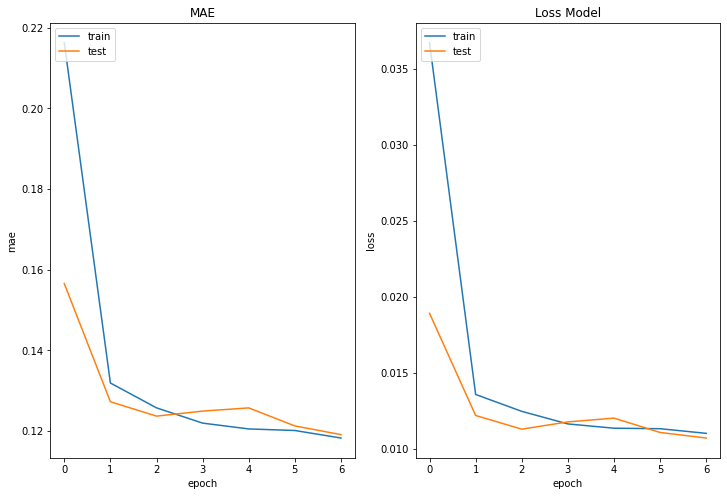

In [ ]:
# ============================================================================================
# PROBLEM C5
#
# Build and train a neural network model using the Daily Min Temperature.csv dataset.
# Use MAE as the metrics of your neural network model.
# We provided code for normalizing the data. Please do not change the code.
# Do not use lambda layers in your model.
#
# The dataset used in this problem is downloaded from https://github.com/jbrownlee/Datasets
#
# Desired MAE < 0.19 on the normalized dataset.
# ============================================================================================

import csv
import math
import os
import urllib.request
import urllib.request

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler


def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)


def solution_C5():
    filename = 'daily-min-temperatures.csv'
    data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

    if not os.path.isfile(filename):
        print('Downloading: ' + filename)
        try:
            urllib.request.urlretrieve(data_url, filename)
        except Exception as inst:
            print(inst)
            print('  Encountered unknown error. Continuing.')
            if os.path.isfile(filename):
                os.remove(filename)

    time_step = []
    temps = []

    with open('daily-min-temperatures.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for index, row in enumerate(reader):
            # YOUR CODE HERE
            temps.append(float(row[1]))
            time_step.append(index)

    # YOUR CODE HERE
    series = np.array(temps)
    time = np.array(time_step)

    # Normalization Function. DO NOT CHANGE THIS CODE
    min = np.min(series)
    max = np.max(series)
    series -= min
    series /= max

    # DO NOT CHANGE THIS CODE
    split_time = 2500

    # Show the figure of series
    plt.figure(figsize=(12, 8))
    plt.plot(time, series)
    plt.title('Daily Max Temperatures')
    plt.xlabel('Time Steps')
    plt.ylabel('Temp')
    plt.show()

    # YOUR CODE HERE
    # Split the data
    time_train = time[:split_time]
    x_train = series[:split_time]
    time_valid = time[split_time:]
    x_valid = series[split_time:]

    # DO NOT CHANGE THIS CODE
    window_size = 64
    batch_size = 256
    shuffle_buffer_size = 1000

    train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
    test_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
    print(train_set)
    print(x_train.shape)

    model = tf.keras.models.Sequential([
        # YOUR CODE HERE.
        tf.keras.layers.Conv1D(32, 5, padding='causal', activation='relu', input_shape=[None, 1]),
        # tf.keras.layers.LSTM(64, return_sequences=True),
        # tf.keras.layers.LSTM(64),
        # or using Biderectional
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1),
        # or with Lambda
        # tf.keras.layers.Lambda(lambda x: x * 200)
    ])

    # YOUR CODE HERE
    # Create Callbacks and instance
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('mae') < 0.12 and logs.get('val_mae') < 0.12):
                self.model.stop_training = True
                print("\nMAE {}".format(logs.get('mae')))
                print("\nVal MAE {}".format(logs.get('val_mae')))
                print("MAE of the model < 20% of data scale")

    callbacks = myCallback()

    # Create Early Stopping
    es_acc = EarlyStopping(monitor="mae", min_delta=0.001, verbose=1, patience=10)
    es_val_acc = EarlyStopping(monitor='val_mae', min_delta=0.001, verbose=1, patience=10)

    # learning rate schedule
    def step_decay(epoch):
        initial_lrate = 0.1
        drop = 0.5
        epochs_drop = 10.0
        lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
        return lrate

    lrate = LearningRateScheduler(step_decay)

    # Compile the model
    optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    # Fit the Model
    history = model.fit(
        train_set,
        epochs=100,
        validation_data=(test_set),
        verbose=2,
        callbacks=[lrate, callbacks, es_acc, es_val_acc]
    )

    # Plotting MAE
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('MAE')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # Plotting Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.show()

    return model


solution_C5()

## **Notes**

[Submission 02 - Delhi Weather - Time Series [Fix].ipynb](https://colab.research.google.com/drive/1uXfz_GVyCXwCZ3cECC_xahCPk6kMfkD5)

*nGood job! Kamu telah menambahkan bagian exploratory data analysis sebelum mulai membuat model. Sebaiknya tidak berhenti pada pembuatan model dan plot MAE & loss model saja. Tetapi diteruskan dengan memprediksi model pada test setnya. Berikut contoh dari implementasi prediksi model time series : [GitHub](https://github.com/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%203%20Lesson%204%20-%20LSTM.ipynb)

* Agar memperluas pengetahuan kamu di bidang machine learning, berikut beberapa tambahan tutorial yang bisa kamu gunakan dalam membangun dan meningkatkan model Time Series:

    * Pelajari cara download Kaggle dataset pada colab menggunakan [Kaggle API](https://www.kaggle.com/general/51898)

    * Pelajari Penggunaan [TimeseriesGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator) untuk mempermudah proses penggunaan time series

    * Anda bisa terapkan penggunaan layer [Bidirectional LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)

    * Pelajari Penggunaan [Custom Callback](https://keras.io/guides/writing_your_own_callbacks/)

    * Pelajari penggunaan callback function untuk memplot hasil training model dengan [tensorboard](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks#tensorboard_in_notebooks) 

    * Pelajari penggunaan [LearningRateScheduler](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)

    * Pelajari penggunaan [EarlyStopping](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)

    * Pelajari cara [tweak learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)


https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

# **Modul 8 : Reinforcement Learning**

perbedaan antara RL dan  supervised / unsupervised learning. Jadi:

* Unsupervised learning mempelajari kemiripan yang ada antara tiap data tanpa label dan mengelompokkannya. 

* Supervised learning mencocokkan data berdasarkan label yang telah disediakan. 

* Reinforcement learning berusaha untuk mendapatkan hadiah sebanyak-banyaknya dan menghindari penalti sesering mungkin.

`TF-agent` adalah sebuah library `Reinforcement Learning` dari Tensorflow yang dikembangkan google dan dirilis ke publik pada tahun 2018. TF-agents menyediakan lingkungan pengembangan RL seperti yang disediakan oleh OpenAI Gym, serta mendukung simulasi fisika 3D dari library PyBullet, dan mendukung simulasi pada lingkungan 3D yang disediakan pada library unity ML agents. 

Selain itu TF-Agents juga mengimplementasikan banyak algoritma populer RL seperti `Reinforce, DQN, dan DDQN`. Library yang dikembangkan Google ini sangatlah cepat, scalable, serta mudah digunakan dan di-customized.

Pada Deep Q-network input dari model hanya sebuah kondisi tertentu. Misalnya ketika player bertemu dengan 4 musuh sekaligus, model akan menghasilkan output berupa aksi yang sesuai untuk kondisi tersebut misalnya aksi yang paling baik adalah berlari mencari perlindungan.

Nah, untuk mengimplementasi Deep Q network pada TF-Agents sendiri sangatlah mudah. Cukup dengan beberapa baris kode, kita dapat menggunakan algoritma DQN serta menciptakan agen kita.

```
import tensorflow as tf
from tf_agents.networks import q_network
from tf_agents.agents.dqn import dqn_agent
 
q_net = q_network.QNetwork(
  train_env.observation_spec(),
  train_env.action_spec(),
  fc_layer_params=(100,))
 
agent = dqn_agent.DqnAgent(
  train_env.time_step_spec(),
  train_env.action_spec(),
  q_network=q_net,
  optimizer=optimizer,
  td_errors_loss_fn=common.element_wise_squared_loss,
  train_step_counter=tf.Variable(0))
 
agent.initialize()
```

https://www.tensorflow.org/agents

In [ ]:
# !pip install tf-agents

# import tensorflow as tf
# from tf_agents.networks import q_network
# from tf_agents.agents.dqn import dqn_agent

# q_net = q_network.QNetwork(
#     train_env.observation_spec(),
#     train_env.action_spec(),
#     fd_layer_param = (100,)
# )

# agent = dqn_agent.DqnAgent(
#     train_env.time_step_spec(),
#     train_env.action_spec(),
#     q_network = q_net,
#     optimizer = optimizer,
#     td_errors_loss_fn = common.element_wise_squared_loss,
#     train_step_counter = tf.Variable(0)
# )

# agent.initialize()

# **Modul 9 : Deployment**

## **01. Web and Android**

### **Web**

**binary classification dataset https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set?**

Untuk mendownload data menggunakan API Kaggle, buat akun Kaggle. Pada kanan atas klik My Profile > Account pada titik tiga > API > Create API Account. Copykan Username & Key pada kode di bawah

In [ ]:
# import os
# os.environ['KAGGLE_USERNAME'] = #UBAH DENGAN USERNAME ANDA
# os.environ['KAGGLE_KEY'] = #UBAH DENGAN PASSWORD ANDA

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
!kaggle datasets download -d marklvl/sentiment-labelled-sentences-data-set

  0% 0.00/326k [00:00<?, ?B/s]
100% 326k/326k [00:00<00:00, 45.4MB/s]


In [ ]:
!unzip -q sentiment-labelled-sentences-data-set.zip -d .

**LSTM**

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df = pd.read_csv('/content/sentiment labelled sentences/yelp_labelled.txt', names=['sentence', 'label'], sep='\t')
df.shape

(1000, 2)

In [ ]:
df.head

<bound method NDFrame.head of                                               sentence  label
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

Text Preprocessing

In [ ]:
# convert to lowercase
df['sentence'] = df['sentence'].str.lower()

In [ ]:
# remove stopwords

from nltk.corpus import stopwords #comment jika Error dan gunakan 2 sintaks dibawah
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

stop = set(stopwords.words('english'))
df['sentence'] = df['sentence'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,sentence,label
0,wow... loved place.,1
1,crust good.,0
2,tasty texture nasty.,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices.,1


Tokenize

In [ ]:
vocab_size = 2000
oov_tok = "<OOV>"
filt = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ' #remove symbols

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok, filters = filt)
tokenizer.fit_on_texts(df['sentence'].values)

word2index = tokenizer.word_index
print(len(word2index))

1998


In [ ]:
import json

with open('word2index.json', 'w') as fp:
    json.dump(word2index, fp)

In [ ]:
max_length =  max(len(values.split()) for i, values in enumerate(df['sentence']))
max_length

18

In [ ]:
trunc_type='post'

all_seq = tokenizer.texts_to_sequences(df['sentence'].values)
all_padded = pad_sequences(all_seq, maxlen = max_length, padding = trunc_type)
all_padded.shape

(1000, 18)

In [ ]:
# split train and test sets
from sklearn.model_selection import train_test_split

X = all_padded
#y = pd.get_dummies(df['label'].values)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#kalimat = df['sentence'].values
#y = df['label'].values

#kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, 
#                                                                test_size=0.2, random_state=1000)

(800, 18) (800,)
(200, 18) (200,)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim= vocab_size, output_dim=16, input_length= max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 18, 16)            32000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dense_31 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 25        
Total params: 54,321
Trainable params: 54,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/30
25/25 [==============================] - 2s 30ms/step - loss: 0.6936 - accuracy: 0.4725 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 2/30
25/25 [==============================] - 0s 10ms/step - loss: 0.6923 - accuracy: 0.5263 - val_loss: 0.6902 - val_accuracy: 0.6300
Epoch 3/30
25/25 [==============================] - 0s 9ms/step - loss: 0.4981 - accuracy: 0.8037 - val_loss: 0.7846 - val_accuracy: 0.7050
Epoch 4/30
25/25 [==============================] - 0s 9ms/step - loss: 0.1892 - accuracy: 0.9388 - val_loss: 0.5980 - val_accuracy: 0.7250
Epoch 5/30
25/25 [==============================] - 0s 9ms/step - loss: 0.0878 - accuracy: 0.9762 - val_loss: 0.9328 - val_accuracy: 0.7350
Epoch 6/30
25/25 [==============================] - 0s 9ms/step - loss: 0.0398 - accuracy: 0.9912 - val_loss: 0.9222 - val_accuracy: 0.7500
Epoch 7/30
25/25 [==============================] - 0s 9ms/step - loss: 0.0301 - accuracy: 0.9925 - val_loss: 1.1543 - val_accuracy: 0.7600
Epoch 8/30
25/25 [

In [ ]:
#def toSequence(sentence):
#  pad = []
#  for stc in sentence.split():
#    if stc.lower() in word2index.keys(): 
#      pad.append(word2index[stc.lower()])
#    else: 
#      continue
#  return pad

#pad = toSequence('affordable price and nice dessert')
#pad = [269, 353, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ,0,0,0,0]
#len(pad)
#model.predict([pad])

Save Model


In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 1.4 MB/s 


In [ ]:
saved_model_path = '/content/mymodel/'
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: /content/mymodel/assets


INFO:tensorflow:Assets written to: /content/mymodel/assets


In [ ]:
!tensorflowjs_converter \
  --input_format=tf_saved_model \
  /content/mymodel/ \
  /content/modeltfjs

2021-10-01 06:16:45.663288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 06:16:45.698818: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 06:16:45.699395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 06:16:45.700652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 06:16:45.701337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

### **Android**

In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
    # YOUR CODE STARTS HERE

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
# YOUR CODE ENDS HERE

model = tf.keras.models.Sequential([
      # YOUR CODE STARTS HERE
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
            # YOUR CODE ENDS HERE
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model fitting
history = model.fit(
        # YOUR CODE STARTS HERE
    training_images, training_labels, epochs=20
        # YOUR CODE ENDS HERE
    )
    # model fitting


4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4407 - accuracy: 0.8388
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2941 - accuracy: 0.8923
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2481 - accuracy: 0.9071
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2160 - accuracy: 0.9194
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1899 - accuracy: 0.9293
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1664 - accuracy: 0.9375
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1461 - accuracy: 0.9446
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1289 - accuracy: 0.9516
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1124 - accuracy: 0.9573
Epoch 10/2

Safe Model to TF Lite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp3sznn8v0/assets


INFO:tensorflow:Assets written to: /tmp/tmp3sznn8v0/assets


In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.pb') 
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets


/root


In [ ]:
import os
import tarfile
def tardir(path, tar_name):
    with tarfile.open(tar_name, "w:gz") as tar_handle:
        for root, dirs, files in os.walk(path):
            for file in files:
                tar_handle.add(os.path.join(root, file))
tardir('root/my_model.pb', 'my_model.tar.gz')
%cd

# path = '/Some/path/to/Pics2'
# filename = 'forcing{0}damping{1}omega{2}set2.png'.format(forcing, damping, omega)
# filename = os.path.join(path, filename)
# fig.savefig(filename)

/root


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **02. Data Pipelines dengan TensorFlow Data Services**

In [ ]:
# import tensorflow as tf
# import tensorflow_datasets as tfds

In [ ]:
#Proses Extract
# dataset = tfds.load(name = "mnist", split = "train")


In [ ]:
#Proses Transform
# BATCH_SIZE = 64
# dataset = dataset.shuffle(1000)
# dataset = dataset.repeat(10)
# dataset = dataset.batch(BATCH_SIZE)

# dataset = dataset.map(lambda x: tf.parse_single_example(x, features))

In [ ]:
#Proses Load
# iterator = dataset.make_one_shot_iterator()
# features = iterator.get_next()

## **03. Export Data ke Training Pipelines**

In [ ]:
import pandas as pd
import numpy as np


import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
import logging
logging.getLogger('tensorflow').disabled = True


In [ ]:
# url = 'https://raw.githubusercontent.com/natashayulian/diamond_dataset/master/diamonds.csv'
url = 'https://github.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/raw/main/data/diamonds.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Split Dataset menjadi train, test, dan validation**

In [ ]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

34521 train examples
8631 validation examples
10788 test examples


In [ ]:
#Membuat target dari prediksi model
# price 0 = low; 1 = high
df['target'] = np.where(df['price']==327, 0, 1)

# Drop un-used columns.
df = df.drop(columns=['price'])

**Create input pipeline using tf data**

In [ ]:
# Cara untuk membuat dataset tf.data dari pandas dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = df.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
batch_size = 10 #bath ukuran kecil untuk demonstrasi
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of carat:', feature_batch['carat'])
  print('A batch of targets:', label_batch )

Every feature: ['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
A batch of carat: tf.Tensor([2.   1.2  2.03 0.7  0.55 0.93 0.7  0.58 0.3  1.59], shape=(10,), dtype=float64)
A batch of targets: tf.Tensor([1 1 1 1 1 1 1 1 1 1], shape=(10,), dtype=int64)


In [ ]:
# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]

# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())


In [ ]:
#numeric column
carat = feature_column.numeric_column('carat')
demo(carat)

[[0.55]
 [0.55]
 [1.  ]
 [0.5 ]
 [0.72]
 [0.3 ]
 [1.53]
 [0.5 ]
 [1.51]
 [0.3 ]]


In [ ]:
#bucketized column 
carat = feature_column.numeric_column('carat')
carat_buckets = feature_column.bucketized_column(carat, boundaries=[1, 2])
demo(carat_buckets)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
#categorical
color_type = feature_column.categorical_column_with_vocabulary_list(
      'color', ['E', 'I','J','D','H', 'G','F'])

color_type_one_hot = feature_column.indicator_column(color_type)
demo(color_type_one_hot)


[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
#embedding
clarity = feature_column.categorical_column_with_vocabulary_list(
      'clarity', df.clarity.unique())
clarity_embedding = feature_column.embedding_column(clarity, dimension=6)
demo(clarity_embedding)

[[ 0.45843512 -0.735745    0.10146039  0.5249415  -0.09455494  0.00132786]
 [ 0.2354997   0.1366924  -0.699451    0.0999438  -0.48777103 -0.50111914]
 [ 0.79810655  0.06063501  0.15026875  0.07430015 -0.42072272 -0.28821692]
 [ 0.2354997   0.1366924  -0.699451    0.0999438  -0.48777103 -0.50111914]
 [ 0.45843512 -0.735745    0.10146039  0.5249415  -0.09455494  0.00132786]
 [-0.45641154  0.22164437 -0.5398297  -0.3482998  -0.6547457   0.22787778]
 [-0.2911551  -0.2234613  -0.01746023  0.1742521   0.07138608  0.6855254 ]
 [-0.45641154  0.22164437 -0.5398297  -0.3482998  -0.6547457   0.22787778]
 [ 0.79810655  0.06063501  0.15026875  0.07430015 -0.42072272 -0.28821692]
 [-0.45641154  0.22164437 -0.5398297  -0.3482998  -0.6547457   0.22787778]]


In [ ]:
#hashed feature
clarity_hashed = feature_column.categorical_column_with_hash_bucket(
      'clarity', hash_bucket_size=5)
demo(feature_column.indicator_column(clarity_hashed))

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#cross feature
#data yang di cross harus berupa string, categorical, atau bucketized
crossed_feature = feature_column.crossed_column([carat_buckets, color_type],
                                                hash_bucket_size=10)
demo(feature_column.indicator_column(crossed_feature))

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
#Pilih feature column mana yang akan digunakan
feature_columns = []

In [ ]:
#embedding column
clarity = feature_column.categorical_column_with_vocabulary_list(
      'clarity', df.clarity.unique())
clarity_embedding = feature_column.embedding_column(clarity, dimension=8)
feature_columns.append(clarity_embedding)

In [ ]:
# numeric column
for header in ['carat', 'depth', 'x', 'y', 'z']:
  feature_columns.append(feature_column.numeric_column(header))

In [ ]:
#membuat feature layer
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
#create, compile, and train the model
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10
1686/1686 [==============================] - 21s 12ms/step - loss: 5.9418e-04 - accuracy: 1.0000 - val_loss: 6.8759e-04 - val_accuracy: 1.0000
Epoch 2/10
1686/1686 [==============================] - 19s 11ms/step - loss: 7.2449e-04 - accuracy: 1.0000 - val_loss: 3.1931e-04 - val_accuracy: 1.0000
Epoch 3/10
1686/1686 [==============================] - 20s 11ms/step - loss: 4.8524e-04 - accuracy: 1.0000 - val_loss: 4.1654e-04 - val_accuracy: 1.0000
Epoch 4/10
1686/1686 [==============================] - 19s 11ms/step - loss: 4.5122e-04 - accuracy: 1.0000 - val_loss: 4.8199e-04 - val_accuracy: 1.0000
Epoch 5/10
1686/1686 [==============================] - 19s 11ms/step - loss: 4.7426e-04 - accuracy: 1.0000 - val_loss: 3.8036e-04 - val_accuracy: 1.0000
Epoch 6/10
1686/1686 [==============================] - 19s 11ms/step - loss: 4.3179e-04 - accuracy: 1.0000 - val_loss: 1.9668e-04 - val_accuracy: 1.0000
Epoch 7/10
1686/1686 [==============================] - 20s 12ms/step - loss

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

1686/1686 [==============================] - 8s 5ms/step - loss: 2.6206e-04 - accuracy: 1.0000
Accuracy 0.9999814629554749


## **04. Tensorboard**

Command for using tensorboard. Kindly please check the lesson on Dicoding

In [ ]:
# %load_ext tensorboard

In [ ]:
# import datetime
# log_dir = "log/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
# file_writer = tf.summary.FileWriter('/path/to/logs', sess.graph)

In [ ]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(
#     log_dir = log_dir, historgram_freq = 1
# )

In [ ]:
# model.fit(x_train, y_train, epochs = 10,
#           validation_data = (x_test, y_test),
#           callbacks = [tensorboard_callback])

In [ ]:
# %tensorboard --logdir logs/fit